In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
import statsmodels.api as sm
from lagged_coherence import lagged_coherence, lagged_hilbert_coherence
from joblib import Parallel, delayed
from scipy.signal import hilbert
from scipy.signal.windows import hann

import statsmodels.api as sm


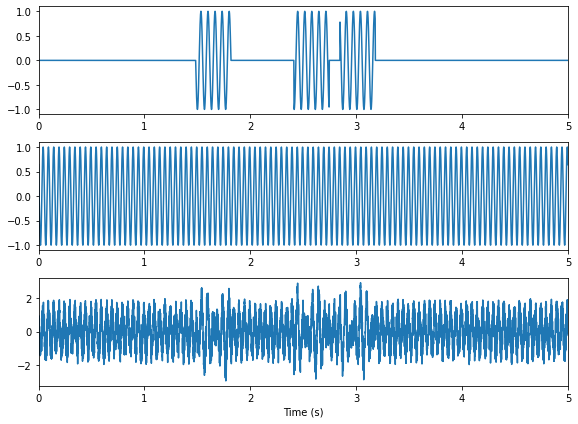

In [2]:
# Generate a simulated signal with 3, bursts at 15Hz with 5 cycles
# and an oscillation at 20Hz, plus white noise

n_trials=100

# Time step (s)
dt=.001
# Duration (s)
T=5
# Time vector
time=np.linspace(0,T,int(T/dt))
# Sampling rate
srate=1/dt

# Burst frequency
f1 = 15
# Length of bursts in cycles
f1_num_cycles=5
# Number of bursts
f1_num_bursts=3

# Oscillation frequency
f2 = 20

signal=np.zeros((n_trials,len(time)))
for t in range(n_trials):
    # Burst signal
    s1=np.zeros((len(time)))

    # Keep track of burst start and stop times so they
    # don't overlap
    burst_starts=[]
    burst_stops=[]
    while len(burst_starts)<f1_num_bursts:
        # Burst duration in seconds
        dur_s=f1_num_cycles/f1
        # Burst duration in time steps
        dur_pts=int(dur_s/dt)

        # Random start and stop time
        start=np.random.randint(int(T/dt)-dur_pts)
        stop=start+dur_pts

        # Check that doesn't overlap with other bursts
        overlap=False
        for (other_start,other_stop) in zip(burst_starts,burst_stops):
            if (start >= other_start and start < other_stop) or (stop > other_start and stop <= other_stop):
                overlap=True
                break

        # Generate burst
        if not overlap:
            s1[start:stop]=np.sin(2. * np.pi * f1 * (time[start:stop]+np.random.randn()))
            burst_starts.append(start)
            burst_stops.append(stop)

    # Oscillatory signal
    s2=np.sin(2. * np.pi * f2 * (time+np.random.randn()))

    # Generated signal
    signal[t,:]=s1+s2+np.random.uniform(-1,1,len(time))

plt.figure(figsize=(8,6))
plt.subplot(3,1,1)
plt.plot(time,s1)
plt.xlim(time[[0,-1]])
plt.subplot(3,1,2)
plt.plot(time,s2)
plt.xlim(time[[0,-1]])
plt.subplot(3,1,3)
plt.plot(time,signal[-1,:])
plt.xlim(time[[0,-1]])
plt.xlabel('Time (s)')
plt.tight_layout()

In [6]:
# Evaluate at 2-10 lag cycles
lags=np.arange(1,10.5,.5)
# Evaluate at 5-100 Hz
freqs=np.arange(5,100,1)

trial_lcs_classic=lagged_coherence(signal, freqs, lags, srate)

Text(0, 0.5, 'Frequency (Hz)')

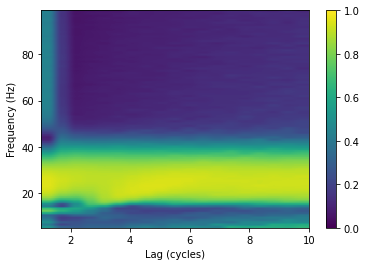

In [7]:
im=plt.imshow(np.mean(trial_lcs_classic,axis=0), extent=[lags[0], lags[-1], freqs[0], freqs[-1]], origin='lower', aspect='auto', vmin=0, vmax=1)
plt.colorbar(im)
plt.xlabel('Lag (cycles)')
plt.ylabel('Frequency (Hz)')

In [8]:
trial_lcs_hilbert=lagged_hilbert_coherence(signal, freqs, lags, srate, n_shuffles=100)

Text(0, 0.5, 'Frequency (Hz)')

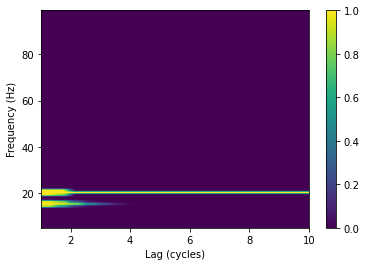

In [11]:
im=plt.imshow(np.mean(trial_lcs_hilbert,axis=0), extent=[lags[0], lags[-1], freqs[0], freqs[-1]], origin='lower', aspect='auto', vmin=0, vmax=1)
plt.colorbar(im)
plt.xlabel('Lag (cycles)')
plt.ylabel('Frequency (Hz)')

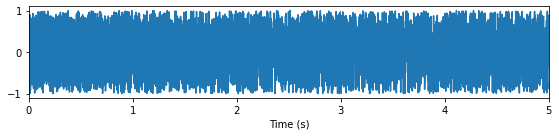

In [7]:
# Generate a simulated signal with just white noise

n_trials=100

# Time step (s)
dt=.001
# Duration (s)
T=5
# Time vector
time=np.linspace(0,T,int(T/dt))
# Sampling rate
srate=1/dt

signal=np.zeros((n_trials,len(time)))
for t in range(n_trials):
    signal[t,:]=np.random.uniform(-1,1,len(time))

plt.figure(figsize=(8,2))
plt.subplot(1,1,1)
plt.plot(time,signal[-1,:])
plt.xlim(time[[0,-1]])
plt.xlabel('Time (s)')
plt.tight_layout()

In [8]:
# Evaluate at 2-10 lag cycles
lags=np.arange(1,10.5,.5)
# Evaluate at 5-100 Hz
freqs=np.arange(5,100,1)

trial_lcs_classic=lagged_coherence(signal, freqs, lags, srate)

Text(0, 0.5, 'Frequency (Hz)')

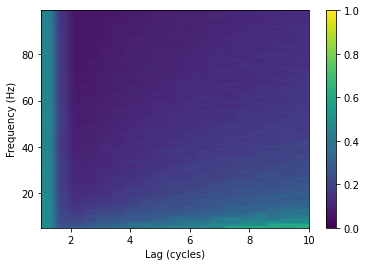

In [9]:
im=plt.imshow(np.mean(trial_lcs_classic,axis=0), extent=[lags[0], lags[-1], freqs[0], freqs[-1]], origin='lower', aspect='auto', vmin=0, vmax=1)
plt.colorbar(im)
plt.xlabel('Lag (cycles)')
plt.ylabel('Frequency (Hz)')

In [10]:
trial_lcs_hilbert=lagged_hilbert_coherence(signal, freqs, lags, srate, n_shuffles=100)

Text(0, 0.5, 'Frequency (Hz)')

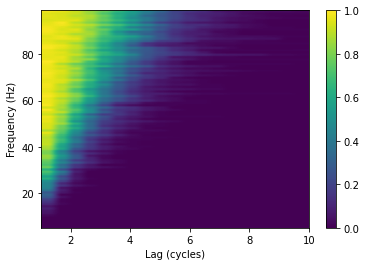

In [11]:
im=plt.imshow(np.mean(trial_lcs_hilbert,axis=0), extent=[lags[0], lags[-1], freqs[0], freqs[-1]], origin='lower', aspect='auto', vmin=0, vmax=1)
plt.colorbar(im)
plt.xlabel('Lag (cycles)')
plt.ylabel('Frequency (Hz)')